# Extract the R/G/B channels from an image file

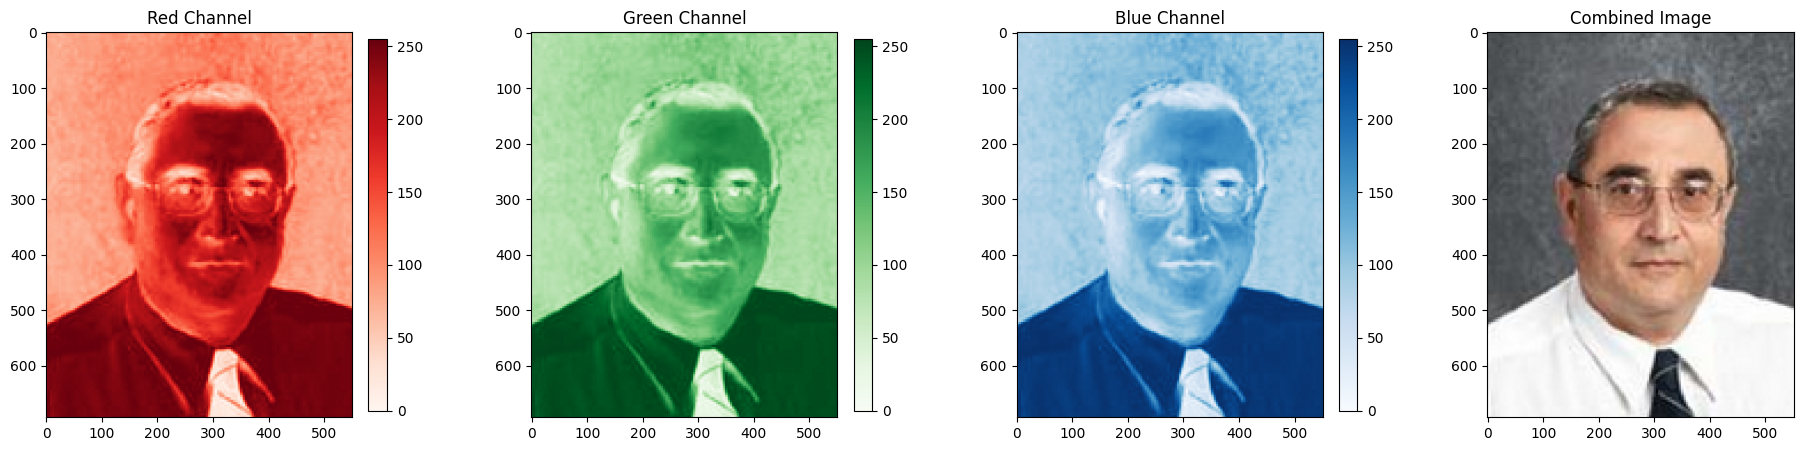

In [28]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Open the PNG image
img = Image.open('enzopaterno.png')

# Isolate RGB channels from original image converted to RGB
r, g, b = np.array(img.convert('RGB').split())

# Save RGB of image, as it was probably not in RGB before
combined_image = Image.merge('RGB', (Image.fromarray(r), Image.fromarray(g), Image.fromarray(b)))
combined_image.save('rgbpaterno.png')

# Store pixel values of each channel
np.savetxt('redpaterno.csv', r, fmt='%i')
np.savetxt('greenpaterno.csv', g, fmt='%i')
np.savetxt('bluepaterno.csv', b, fmt='%i')

# Create a display grid
fig, axs = plt.subplots(1, 4, figsize=(24, 5))

# Display the red channel
red = axs[0].imshow(r, cmap='Reds', vmin=0, vmax=255)
axs[0].set_title('Red Channel')
fig.colorbar(red, ax=axs[0], orientation='vertical', fraction=0.046, pad=0.04)

# Display the green channel
green = axs[1].imshow(g, cmap='Greens', vmin=0, vmax=255)
axs[1].set_title('Green Channel')
fig.colorbar(green, ax=axs[1], orientation='vertical', fraction=0.046, pad=0.04)

# Display the blue channel
blue = axs[2].imshow(b, cmap='Blues', vmin=0, vmax=255)
axs[2].set_title('Blue Channel')
fig.colorbar(blue, ax=axs[2], orientation='vertical', fraction=0.046, pad=0.04)

combined = axs[3].imshow(combined_image)
axs[3].set_title('Combined Image')

# Show the plot
plt.show()


# Simulate the RGB image sizes of 3,000 random image files

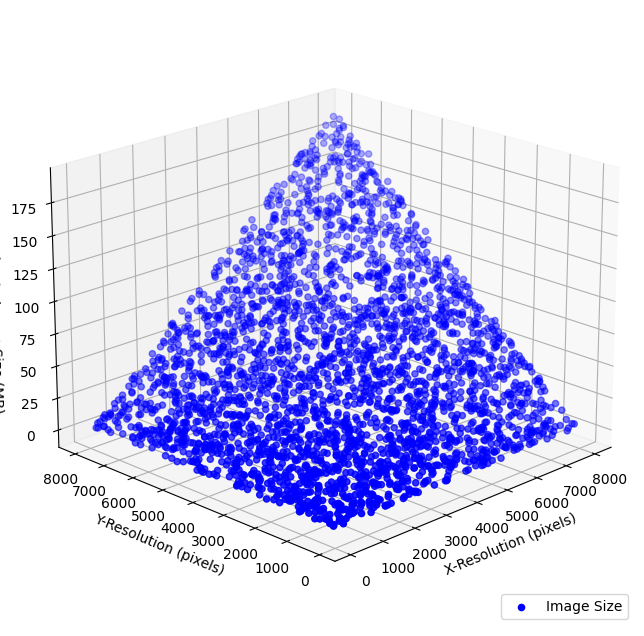

In [81]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random data for demonstration
x_resolution = np.random.randint(100, 8000, size=3000)
y_resolution = np.random.randint(100, 8000, size=3000)
img_size = 3 * x_resolution * y_resolution / 1e6

# Plotting
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x_resolution, y_resolution, img_size, c='blue', marker='o', label='Image Size')

ax.set_xlabel('X-Resolution (pixels)')
ax.set_ylabel('Y-Resolution (pixels)')
ax.set_zlabel('Approximate Image Size (MB)')

# Adjust legend position
ax.legend(loc='lower right')

# Adjust view of the graph
ax.view_init(elev=20, azim=225)

ax.grid(True)
plt.show()